In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits

# Elbow method vs MNIST

In [2]:
digits = load_digits()
# print(digits.DESCR)

print("digits.keys() =", digits.keys())
print("digits.images.shape =", digits.images.shape)
print("digits.data.shape =", digits.data.shape)
print("digits.target.shape =", digits.target.shape)

digits.keys() = dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.images.shape = (1797, 8, 8)
digits.data.shape = (1797, 64)
digits.target.shape = (1797,)


In [3]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [4]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

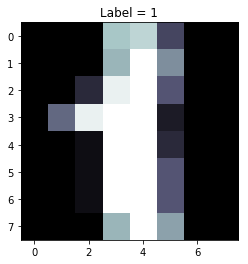

In [5]:
plt.imshow(digits.images[1], cmap=plt.cm.bone)
plt.title("Label = "+str(digits.target[1]))
plt.show()

## Zad.

Wyznacz optymalną ilość klastrów za pomocą *Elbow method*.

In [7]:
X = digits.data
y = digits.target

SSE_array = [None]
    
for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)
    


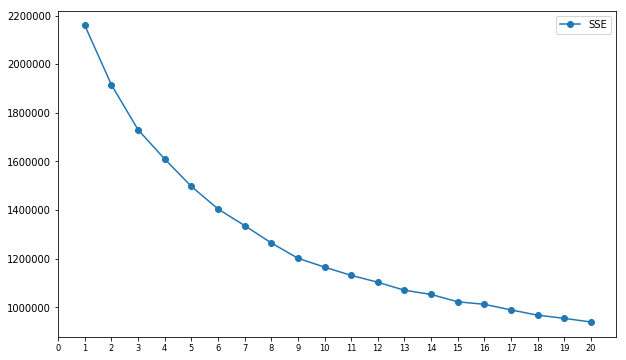

In [8]:
t=range(0,21)

plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
wykonaj algorytm dla $k=10$ i wypisz:
  * wszystkie miary dopasowania
  * crosstab

In [14]:
km = KMeans(n_clusters=10, n_init=10)
y_km = km.fit_predict(X)

In [15]:
pd.crosstab(y,y_km)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,0,0,0,0,1,0,177,0
1,2,0,99,1,24,0,0,55,0,1
2,0,2,8,13,148,3,0,2,1,0
3,0,13,7,154,0,7,0,0,0,2
4,0,0,2,0,0,10,162,7,0,0
5,1,43,0,0,0,0,2,0,0,136
6,177,0,2,0,0,0,0,1,1,0
7,0,0,2,0,0,174,0,2,0,1
8,2,52,100,2,3,5,0,6,0,4


In [16]:
print(metrics.adjusted_rand_score(y, y_km))
print(metrics.adjusted_mutual_info_score(y,  y_km))

0.665031845251332
0.7359810170598992
